# Машинное обучение

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [ ]:
import numpy as np

Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [ ]:
def max_element(arr):
    try:
        return arr[1:][(arr==0)[:-1]].max()
    except:
        return None

Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [ ]:
def nearest_value(X, v):
    razn = abs(v - X)
    minInd = np.argmin(razn)
    return X.ravel()[minInd]


Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [ ]:
def scale(X):
    def scale(X):
    Xmean = np.mean(X, axis=0)
    Xstd = np.std(X, axis=0)
    try:
        return (X-Xmean)/Xstd
    except ZeroDivisionError:
        return None

 Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [77]:
def get_stats(X):
    opr = np.linalg.det(X)
    sled = np.trace(X)
    minEl = np.min(X)
    maxEl = np.max(X)
    norm = np.linalg.norm(X)
    eig = np.linalg.eig(X)
    inv = np.linalg.inv(X)
    print(opr, '\n', sled, '\n',  minEl, '\n',  maxEl, '\n',  norm, '\n',  eig, '\n',  inv)
    
m, s = 0.5, 0.1
newArray=np.random.normal(m, s, (3, 3))
print(newArray)
get_stats(newArray);

[[0.45231532 0.48549106 0.54176643]
 [0.54072969 0.57351492 0.48441058]
 [0.46770251 0.35780916 0.55088834]]
-0.010619022696480539 
 1.5767185805485107 
 0.35780916440572574 
 0.5735149194288928 
 1.4966676829636163 
 (array([ 1.48048768, -0.04928962,  0.14552052]), array([[ 0.57394183,  0.82285471, -0.01693581],
       [ 0.62486459, -0.40215277, -0.73983458],
       [ 0.52927782, -0.40147636,  0.67257563]])) 
 [[-13.43025078   6.93118146   7.11309541]
 [  6.71640305   0.39648486  -6.95382868]
 [  7.03985017  -6.14207381   0.2928562 ]]


Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [49]:
a = np.zeros(100)

for exp_num in range(100):
    X1 = np.random.normal(0, 1, (10, 10))
    X2 = np.random.normal(0, 1, (10, 10))
    Y = X1.dot(X2)
    a[exp_num] = np.max(Y)

print(np.mean(a))
print(np.percentile(a, 95))

8.851031262731146
12.35378274781151


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

In [ ]:
import pandas as pd
%matplotlib inline

Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [78]:
dataframe = pd.read_csv("2008.csv")
cancel = dataframe[['CancellationCode', 'Cancelled']]
cancel[cancel.Cancelled == 1].groupby('CancellationCode').count()

,Cancelled
CancellationCode,
A,563
B,549
C,299


 Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [8]:
dataframe = pd.read_csv("2008.csv")
maxDistance = dataframe[['Distance']].max()
minDistance = dataframe[['Distance']].min()
avgDistance = dataframe[['Distance']].mean()

print(maxDistance)
print(minDistance)
print(avgDistance)

Distance    4962
dtype: int64
Distance    31
dtype: int64
Distance    724.508257
dtype: float64


 Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [79]:
dataframe = pd.read_csv("2008.csv")
minDistance = dataframe[['Distance']].min()
dist = dataframe[dataframe.Distance == int(minDistance)][['Year','Month','DayofMonth', 'DayOfWeek', 'FlightNum']]
flight = distanceFrame.merge(dataframe, on=["FlightNum"])[['Year_y','Month_y','DayofMonth_y', 'DayOfWeek_y', 'FlightNum', 'Distance']]

print(dist)
print(flight)


       Year  Month  DayofMonth  DayOfWeek  FlightNum
1116   2008     12          30          2         65
6958   2008     12          26          5         65
17349  2008      8          18          1         64
27534  2008      3          11          2         64
46082  2008      8           9          6         65
48112  2008      2          28          4         64
     Year_y  Month_y  DayofMonth_y  DayOfWeek_y  FlightNum  Distance
0      2008       12            30            2         65        31
1      2008        7            10            4         65       680
2      2008       10            18            6         65        82
3      2008       12            26            5         65        31
4      2008        7            24            4         65       571
..      ...      ...           ...          ...        ...       ...
229    2008        1            16            3         64       571
230    2008        9            14            7         64       680
231    2

Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [32]:
dataframe = pd.read_csv("2008.csv")
airport = pd.read_csv("airports.csv")
dataframe.groupby('Origin').count()[['Year']].sort_values(by=['Year'], ascending=False)
airport[airport.iata == 'ATL']

,iata,airport,city,state,country,lat,long
880,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944


Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [20]:
dataframe = pd.read_csv("2008.csv")
dataframe[['Origin','AirTime']].groupby('Origin').mean().sort_values(by=['AirTime'], ascending=False)

,AirTime
Origin,
SJU,205.200000
BQN,193.954545
PSE,191.875000
STT,185.029412
ANC,165.415094
...,...
PSG,20.250000
OXR,19.666667
WRG,18.000000


Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [76]:
df = pd.read_csv('2008.csv');
print(df[['Origin','DepDelay']].groupby(['Origin']).filter(lambda x: x['Origin'].count()>1000).sort_values(by=['DepDelay'], ascending=False).head(1))


     Origin  DepDelay
3635    MCO     750.0


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [265]:
data = pd.read_csv('2008.csv')
print("Имеются ли в данных пропущенные значения?", data.isnull().values.any())
print("Сколько всего пропущенных элементов в таблице \"объект-признак\"?", data.isnull().values.sum())
print("Сколько объектов имеют хотя бы один пропуск?", np.count_nonzero(np.array(data.isnull().values.sum(axis=1))))
print("Сколько признаков имеют хотя бы одно пропущенное значение?", np.count_nonzero(np.array(data.isnull().values.sum(axis=0))))

Имеются ли в данных пропущенные значения? True
Сколько всего пропущенных элементов в таблице "объект-признак"? 355215
Сколько объектов имеют хотя бы один пропуск? 70000
Сколько признаков имеют хотя бы одно пропущенное значение? 16


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [266]:
print("Имеются ли пропущенные значения в целевой переменной?", data['DepDelay'].isnull().sum())

Имеются ли пропущенные значения в целевой переменной? 1399


Исключаем из выборки объекты без целевой переменной

In [267]:
data=data[(data.DepDelay!=0) & (data.DepDelay.notnull())]
print(data)

       Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  ...  \
0      2008      6          18          3   2111.0        2055   2308.0  ...   
1      2008      6           4          3   1426.0        1410   1730.0  ...   
2      2008      8           3          7   1143.0        1145   1501.0  ...   
3      2008      1          23          3   1141.0        1144   1323.0  ...   
4      2008      5           4          7    815.0         820   1243.0  ...   
...     ...    ...         ...        ...      ...         ...      ...  ...   
69994  2008      1          26          6    920.0         925   1110.0  ...   
69995  2008      5          12          1   1829.0        1840   2137.0  ...   
69996  2008      5          11          7   1149.0        1125   1336.0  ...   
69998  2008      2          18          1   1906.0        1900   2200.0  ...   
69999  2008     12           6          6    859.0         900    959.0  ...   

       CancellationCode Diverted  Carri

Исключаем CancellationCode и Cancelled

In [268]:
data.drop(['CancellationCode','Cancelled'], axis = 1, inplace = True)
data.shape

(63404, 27)

Выделяем целевую переменную, исключаем её из матрицы "объект-признак"

In [269]:
vect = data['DepDelay']
data.drop(['DepDelay'], axis = 1, inplace = True)

**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [270]:
for col in ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']:
    data[col+'_Hour'] = data[col]//100
    data[col+'_Minute'] = data[col]%100
    data.drop([col], axis=1, inplace=True)

In [271]:
data.shape

(63404, 30)

**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [290]:
df111 = pd.read_csv('2008.csv')
corr = df111.corr() 
print(corr)

                   Year     Month  DayofMonth  DayOfWeek   DepTime  \
Year                NaN       NaN         NaN        NaN       NaN   
Month               NaN  1.000000   -0.002155  -0.010587 -0.007985   
DayofMonth          NaN -0.002155    1.000000   0.014100  0.001977   
DayOfWeek           NaN -0.010587    0.014100   1.000000  0.005246   
DepTime             NaN -0.007985    0.001977   0.005246  1.000000   
CRSDepTime          NaN -0.005269    0.002034   0.005131  0.964394   
ArrTime             NaN -0.002270   -0.001386   0.005298  0.715755   
CRSArrTime          NaN  0.002922    0.000796   0.005630  0.791983   
FlightNum           NaN  0.001935    0.008456  -0.006384 -0.005016   
ActualElapsedTime   NaN -0.012743   -0.006916   0.012766 -0.014895   
CRSElapsedTime      NaN -0.001948   -0.005139   0.015049 -0.012023   
AirTime             NaN -0.011421   -0.006675   0.013594 -0.020915   
ArrDelay            NaN -0.040420    0.006154   0.002958  0.176033   
DepDelay            

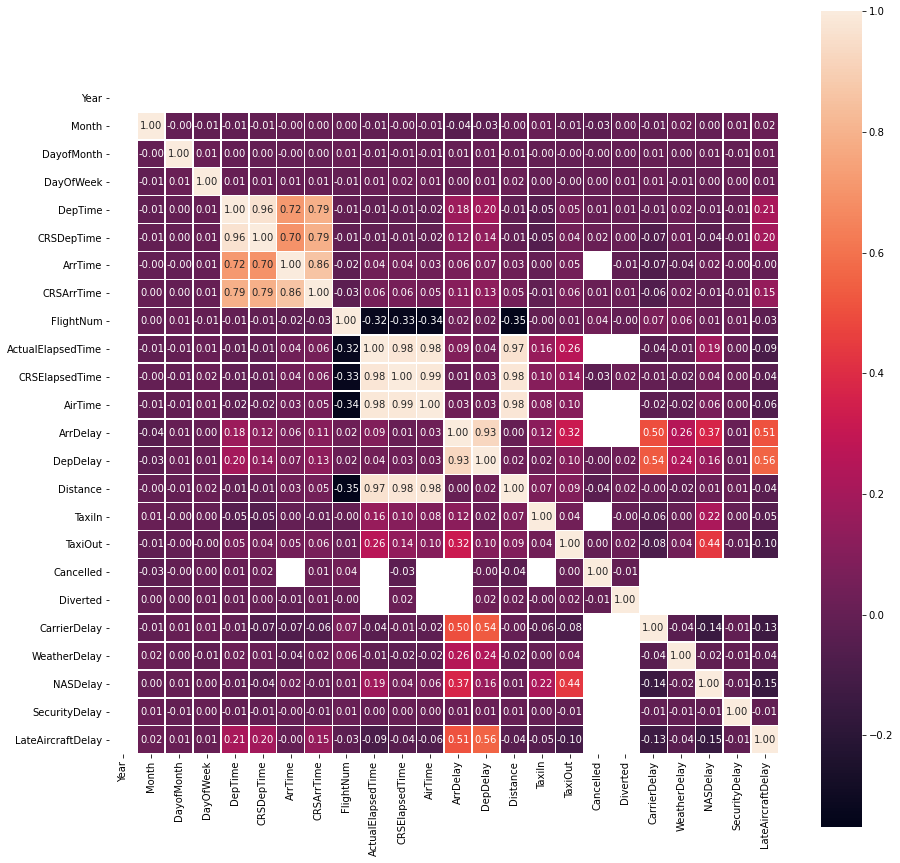

In [273]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize =(15,15))
heatmap = sns.heatmap(corr, annot=True, fmt=".2f", square=True, linewidths=.4,  ax=ax)

In [274]:
heatmap = corr.loc['DepDelay',:]
heatmap[heatmap >= 0.5]

ArrDelay             0.930046
DepDelay             1.000000
CarrierDelay         0.535580
LateAircraftDelay    0.558168
Name: DepDelay, dtype: float64

In [275]:
data.drop(['ArrDelay','CarrierDelay','LateAircraftDelay'], axis = 1, inplace = True)
data.drop(['TailNum','Year'], axis = 1, inplace = True)
data.shape

(63404, 25)

**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

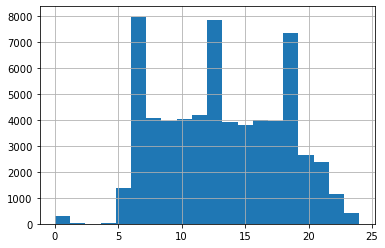

In [277]:
data['DepTime_Hour'].hist(bins=20)

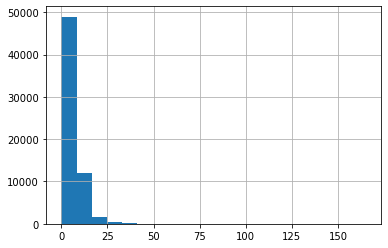

In [278]:
data['TaxiIn'].hist(bins=20)

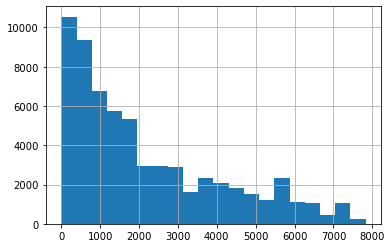

In [279]:
data['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [285]:

from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 15)


def transform_data(data):
    StSc = StandardScaler()
    for col in data.columns:
        if data[col].dtype.name == 'object':
            data[col].fillna('nan', inplace = True)
        else:
            data[col].fillna(0, inplace = True)
            data[col]= StSc.fit_transform(data[col].values.reshape(-1, 1)).flatten('F')
    data = pd.get_dummies(data)
    return data

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [286]:
transform_data=transform_data(data)
transform_data.shape
print('После преобразования получилось ', transform_data.shape[1], ' признака')

После преобразования получилось  636  признака


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [288]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transform_data, vect, test_size=0.3, random_state=42)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [ ]:
# Your code here

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**18. (0.5 балла)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.17. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [ ]:
# Your code here

### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**19. (0 баллов)** Добавьте к объектам обеих выборок из п. 16 единичный признак.

In [ ]:
# Your code here

**20. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [ ]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    pass

In [ ]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    pass

In [ ]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    pass

In [ ]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    pass

In [ ]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    pass

**21. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [ ]:
def grad_descent(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

In [ ]:
# Your code here

**22. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**23. (1 доп. балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [ ]:
def sgd(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

In [ ]:
# Your code here

**24. (0.5 доп. балла)** Аналогично п.22 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

**25. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.22? Почему?

In [ ]:
# Your code here

Здесь вы можете поделиться своими мыслями по поводу этого задания.

А здесь — вставить вашу любимую картинку.